In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [9]:
hotels = pd.read_excel("../data/HotelCustomersDataset.xlsx")

hotels["date"] = (pd.to_datetime("2023-09-10") - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [10]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2023-04-13
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2020-09-10
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-09-10
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2020-09-10
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-09-10


# Assignment 1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

In [11]:
daily_revenue = hotels.groupby("date").agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})

monthly_revenue = daily_revenue.resample("M").sum()

C:\Users\ahosny\AppData\Local\Temp\ipykernel_34788\558429915.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = daily_revenue.resample("M").sum()


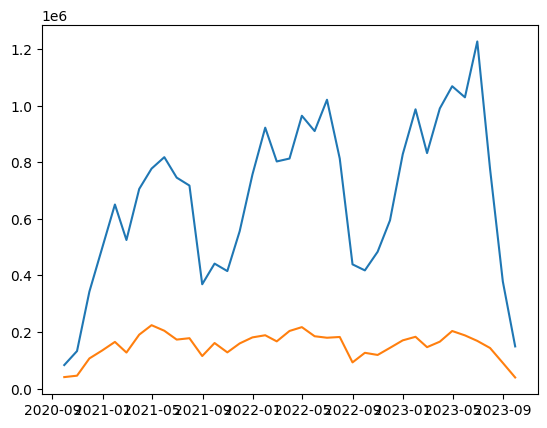

In [12]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue)

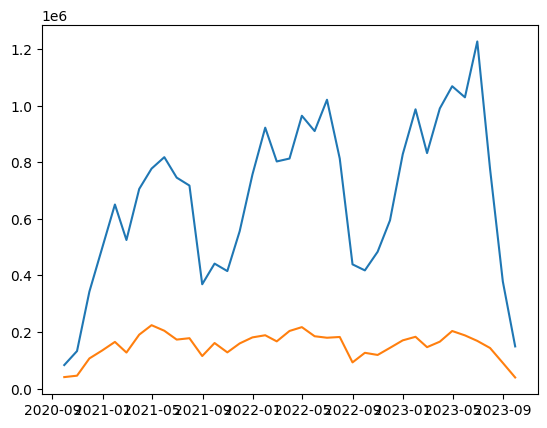

In [13]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue["LodgingRevenue"])
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"])

# Assignment 2: Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and a y-axis label, remove the top and right borders, and add a legend.

Consider modifying the font sizes as well.

Thanks!

In [34]:
daily_revenue = hotels.groupby("date").agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})

monthly_revenue = daily_revenue.resample("M").sum()

C:\Users\ahosny\AppData\Local\Temp\ipykernel_34788\558429915.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = daily_revenue.resample("M").sum()


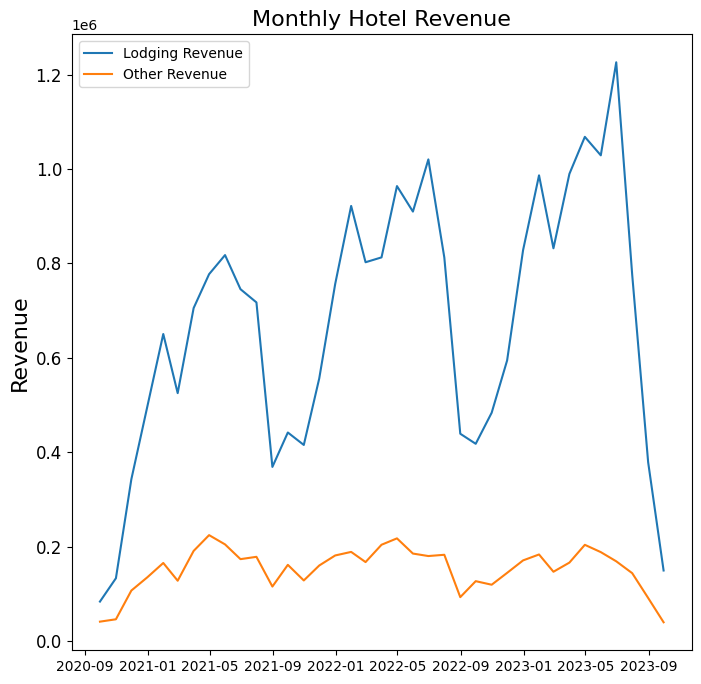

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(
    monthly_revenue.index, 
    monthly_revenue["LodgingRevenue"], 
    label="Lodging Revenue"
)

ax.plot(
    monthly_revenue.index, 
    monthly_revenue["OtherRevenue"], 
    label="Other Revenue"
)

ax.legend(loc="upper left")

ax.set_title("Monthly Hotel Revenue", fontsize=16)
ax.set_ylabel("Revenue", fontsize=16)

plt.yticks(fontsize=12)

plt.show()

# Assignment 3: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help). 

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.

Thanks!

In [16]:
room_nights = hotels.groupby("date").agg({"RoomNights":"sum", "BookingsCanceled":"sum"})

monthly_bookings = room_nights.resample("Q").sum()

C:\Users\ahosny\AppData\Local\Temp\ipykernel_34788\3754549452.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  monthly_bookings = room_nights.resample("Q").sum()


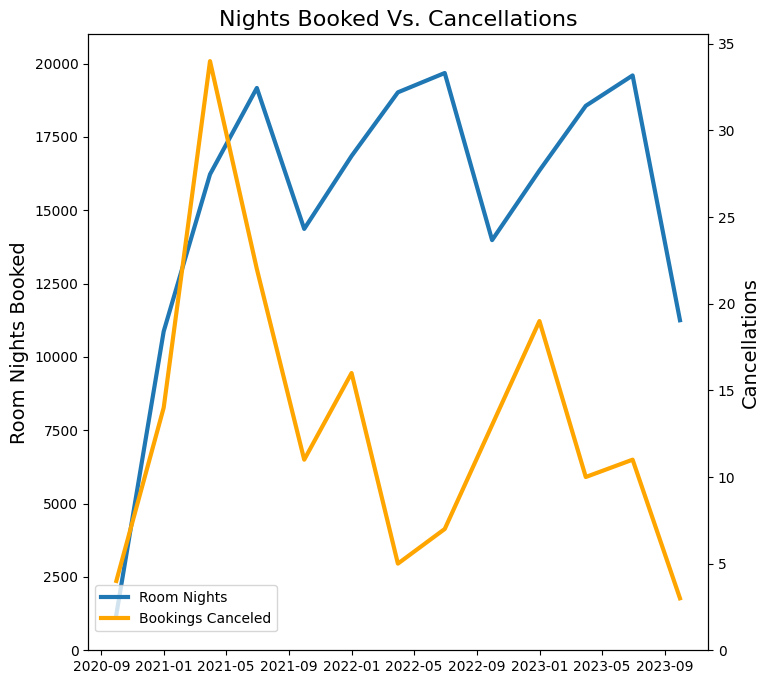

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.set_title("Nights Booked Vs. Cancellations", fontsize=16)
ax.set_ylabel("Room Nights Booked", fontsize=14)
ax.set_ylim(0, 21000)

ax.plot(
    monthly_bookings.index, 
    monthly_bookings["RoomNights"], 
    label="Room Nights", 
    linewidth=3
)

ax2 = ax.twinx()
ax2.set_ylabel("Cancellations", fontsize=14)

ax2.plot(
    monthly_bookings.index, 
    monthly_bookings["BookingsCanceled"], 
    label="Bookings Canceled",
    color="orange",
    linewidth=3
)

ax2.set_ylim(0)

fig.legend(bbox_to_anchor=(.37, .2))

# Assignment 4: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

In [18]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2023-04-13
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2020-09-10
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-09-10
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2020-09-10
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-09-10


In [19]:
countries = hotels.groupby("Nationality").agg({"RoomNights":"sum", "LodgingRevenue":"sum"}).sort_values("RoomNights", ascending=False).iloc[:10]

Text(0, 0.5, 'Room Nights')

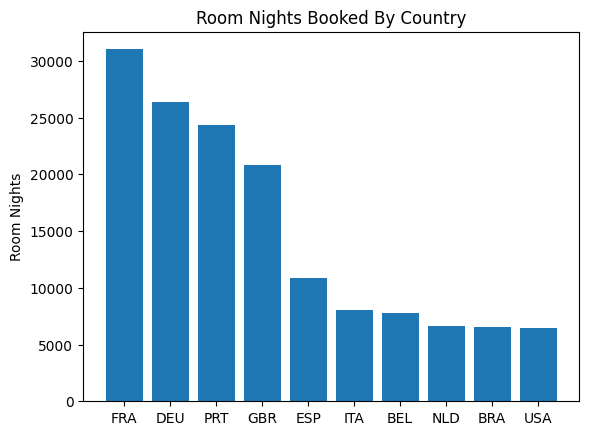

In [20]:
fig, ax = plt.subplots()

ax.bar(countries.index, countries["RoomNights"])

ax.set_title("Room Nights Booked By Country")
ax.set_ylabel("Room Nights")

Text(0.5, 0, 'Revenue (Million Euro)')

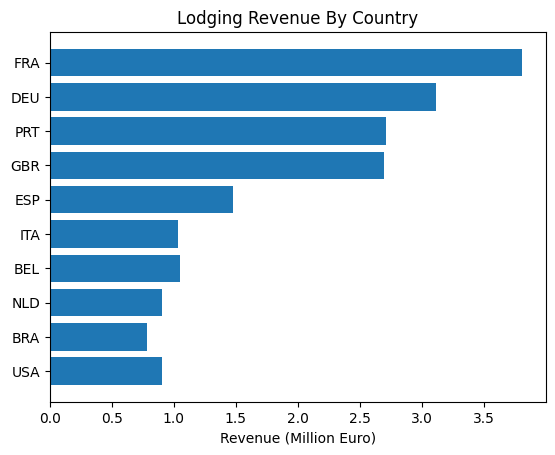

In [21]:
fig, ax = plt.subplots()

ax.barh(
    countries.index[::-1], 
    countries["LodgingRevenue"][::-1] / 1000000
)

ax.set_title("Lodging Revenue By Country")
ax.set_xlabel("Revenue (Million Euro)")

# Assignment 5: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries by room nights.
* Plot the LodgingRevenue and OtherRevenue side by side.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline. 

Thanks!

In [22]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]

country_subset = (hotels
                  .loc[hotels["Nationality"].isin(countries)]
                  .groupby("Nationality")
                  .agg({"LodgingRevenue": "sum", "OtherRevenue":"sum" })
                  .sort_values("LodgingRevenue", ascending=False))

country_subset.head()

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


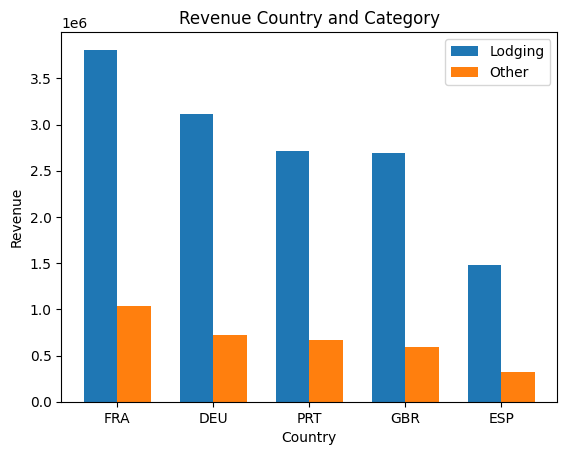

In [23]:
fig, ax = plt.subplots()

x = np.arange(0, len(countries))
width = 0.35

ax.bar(x - width/2, country_subset["LodgingRevenue"], width, label="Lodging")
ax.bar(x + width/2, country_subset["OtherRevenue"], width, label="Other") 

ax.set_title("Revenue Country and Category")
ax.set_ylabel("Revenue")
ax.set_xlabel("Country")
ax.legend()

plt.xticks(range(len(countries)), countries)

plt.show()

In [24]:
country_subset_pcts = country_subset.apply(lambda x: x * 100 / sum(x), axis=1)

country_subset_pcts.head(1)

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,78.664529,21.335471


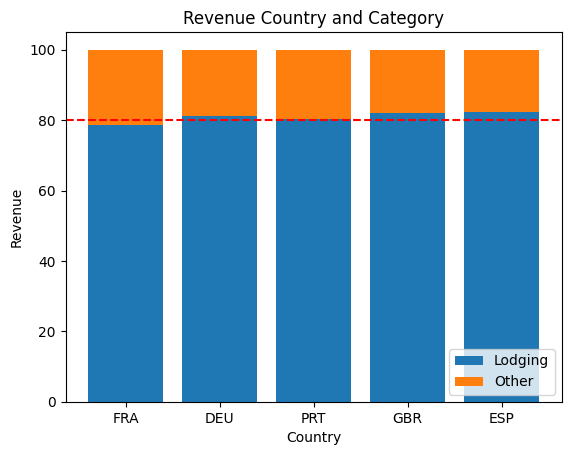

In [25]:
fig, ax = plt.subplots()

x = np.arange(0, len(countries))

ax.bar(
    countries, 
    country_subset_pcts["LodgingRevenue"], 
    label="Lodging"
)
ax.bar(
    countries, 
    country_subset_pcts["OtherRevenue"], 
    label="Other", 
    bottom=country_subset_pcts["LodgingRevenue"]
) 

ax.axhline(80, 0, 1, c="red", ls="--")
plt.xticks(range(len(countries)), countries)

ax.set_title("Revenue Country and Category")
ax.set_ylabel("Revenue")
ax.set_xlabel("Country")
ax.legend(loc="lower right")

# Assignment 6: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

In [26]:
country_pcts = (hotels
                .groupby("Nationality")
                .agg({"LodgingRevenue": "sum"})
                .sort_values("LodgingRevenue", ascending=False)
                .apply(lambda x: x * 100 / sum(x)))

In [27]:
pie_data = (pd.concat([country_pcts.iloc[:5], 
                       pd.DataFrame(
                           {
                               "LodgingRevenue": country_pcts.iloc[5:, 0].sum()
                           }
                           , index=["OTH"])]
                     )
           ).iloc[::-1]

Text(0.5, 1.0, 'Percent of Revenue by Country')

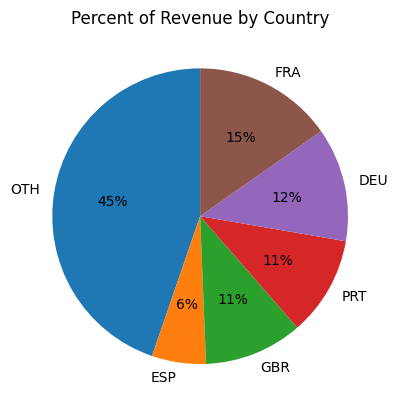

In [28]:
fig, ax = plt.subplots()

ax.pie(pie_data["LodgingRevenue"], 
       startangle=90,
       labels = pie_data.index,
       autopct='%.0f%%')

ax.set_title("Percent of Revenue by Country")

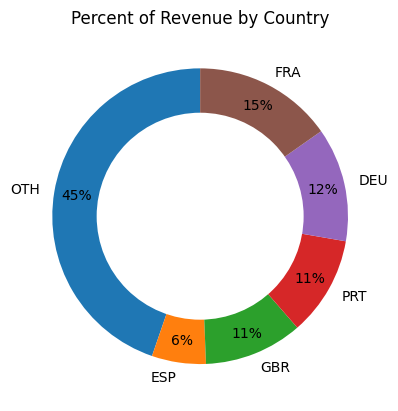

In [29]:
fig, ax = plt.subplots()

ax.pie(pie_data["LodgingRevenue"], 
       startangle=90,
       labels = pie_data.index,
       autopct='%.0f%%',
       pctdistance=.85)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

ax.set_title("Percent of Revenue by Country");

# Assignment 7: Scatterplots & Histograms

* Builld a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france. Make sure to tweak your alpha!

Thanks!

In [30]:
hotels = hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                       revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"]
                      )

In [31]:
agg_hotels = hotels.groupby("Nationality").agg(
                                  total_revenue = ("total_revenue", "sum"),
                                  avg_revenue = ("total_revenue", "mean"),
                                  avg_age = ("Age", "mean"),
                                  avg_nights = ("RoomNights", "mean"),
                                  avg_nightly_revenue = ("revenue_per_night", "mean")
)

Text(0.5, 0, 'Avg. Revenue Per Customer')

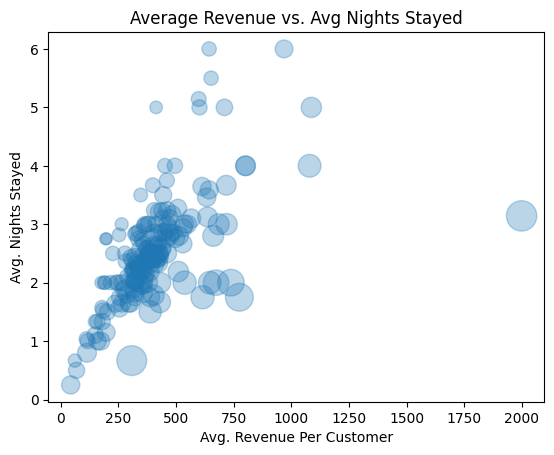

In [32]:
fig, ax = plt.subplots()

ax.scatter(
    agg_hotels["avg_revenue"], 
    agg_hotels["avg_nights"], 
    s=agg_hotels["avg_nightly_revenue"],
    alpha=.3
)

ax.set_title("Average Revenue vs. Avg Nights Stayed")
ax.set_ylabel("Avg. Nights Stayed")
ax.set_xlabel("Avg. Revenue Per Customer")

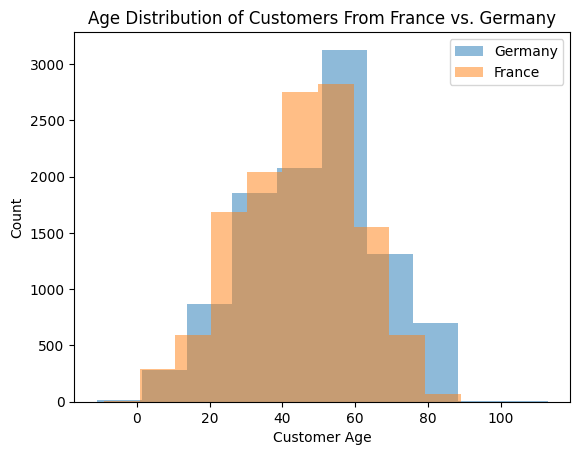

In [33]:
fig, ax = plt.subplots()

ax.hist(hotels.loc[hotels["Nationality"] == "DEU", "Age"], alpha=.5)
ax.hist(hotels.loc[hotels["Nationality"] == "FRA", "Age"], alpha=.5)

ax.set_title("Age Distribution of Customers From France vs. Germany")
ax.set_xlabel("Customer Age")
ax.set_ylabel("Count")

ax.legend(["Germany", "France"])